In [17]:
from encodings import search_function
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [20]:
class LogisticRegression:
    '''
    This is a class for Logistic Regression algorithm.
    
    The class contains the hyper parameters of the logistic regression algorithm as attributes.
    It also contains the functions for initializing the class, fitting the ridge regression model and use the fitted 
    model to predict test samples.
    
    Attributes:
        lr:        learning rate of gradient descent
        max_itr:   maximum number of iteration for gradient descent
        tol:       if the change in loss is smaller than tol, then we stop iteration
        W:         concatenation of weight w and bias b
        verbose:   whether or not print the value of logitic loss every 1000 iterations
        
    '''
    def __init__(self, lr=0.01, max_itr=100000, tol = 1e-5, verbose = False):
        self.lr = lr
        self.max_itr = max_itr
        self.tol = tol
        self.verbose = verbose
 
    def __sigmoid(self, z):
        '''
        Define the Sigmoid function to convert from real value to [0,1]
        
        Args: 
            z (matrix, num_samples*1): scores or real value
            
        Returns:
            A matrix (num_variables+1)*1: a value in the interval [0,1]
        '''
        return 1 / (1 + np.exp(-z))
    
    def __logistic_loss(self, h, y):
        '''
        Calculate the logistic loss
        '''
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, x, y):
        '''
        estimate the weight and bias in the logistic regression model by gradient descent
        
        Args: 
            x (matrix, num_train*num_variables): input of training samples
            y (matrix, num_test*1): labels of training samples, 0 or 1
            
        Returns:
            self.W (matrix, (num_variables+1)*1): estimation of weight and bias, i.e (w,b)
        '''
        ### Add the all-one vector to the last column 
        m = x.shape[0]
        X = np.concatenate((x, np.ones((m, 1))), axis=1)
        y = y.reshape(-1,1)
        # weight and bias initialization
        d = X.shape[1]
        self.W = np.zeros((d,1))
        
        z = np.dot(X, self.W)
        h = self.__sigmoid(z)
        previous_loss = self.__logistic_loss(h, y)
        for i in range(self.max_itr):
            ######################################
            ######################################
            ####### Write your codes below #######
            ### Calculate the gradient and update self.W
            p1 = np.divide(np.exp(np.dot(X, self.W)),(1+np.exp(np.dot(X,self.W))))
            
            grad = - 1/m * (np.dot(np.transpose(X),y-p1))

            self.W = self.W - self.lr * grad

            ######################################
            ######################################
            
            #Calculate the new logistic loss
            z = np.dot(X, self.W)
            h = self.__sigmoid(z)
            current_loss = self.__logistic_loss(h, y)
            if previous_loss - current_loss < self.tol:
                print('Converged after {} iterations'.format(i+1))
                print('Logistic loss after {} iterations is {}'.format(i+1,current_loss))
                break
            else:
                previous_loss = current_loss
            if(self.verbose == True and i % 10000 == 0):
                print('Logistic loss after {} iterations is {}'.format(i+1,current_loss))
        return self.W
    
    def predict_prob(self, x):
        '''
        predict the posterior probability p_1(x; W) of the test samples
        
        Args: 
            x (matrix, num_test*num_variables): input of test samples
            
        Returns:
            y (matrix, num_test*1): predicted posterior probability p_1(x; W) of test samples
        ''' 
        ######################################
        ######################################
        ####### Write your codes below #######
        m = x.shape[0]
        X = np.concatenate((x,np.ones((m,1))),axis=1)    
        y = np.divide(np.exp(np.dot(X, self.W)),(1+np.exp(np.dot(X,self.W))))
        
        return y
        ######################################
        ######################################
    
    def predict(self, x):
        '''
        predict the label of the test samples
        
        Args: 
            x (matrix, num_test*num_variables): input of test samples
            
        Returns:
            y (matrix, num_test*1): predicted labels of test samples, 0 or 1
        ''' 
        ######################################
        ######################################
        ####### Write your codes below #######
        m = x.shape[0]
        X = np.concatenate((x,np.ones((m,1))),axis=1)
        y = 1 / (1 + np.exp(-np.dot(X,self.W)))
        y = np.where(y>0.5,1,0)
        
        return y
        ######################################
        ######################################

In [61]:
# load datasets function
def load_data(data_file_name):
    data_dir = "..\..\..\data\data_classification"
    data_path = os.path.join(data_dir, data_file_name)
    df = pd.read_csv(data_path)
    data_X = df.iloc[:,:-1]
    data_y = df.iloc[:,-1]
    scaler_X = StandardScaler()
    data_X = scaler_X.fit_transform(data_X)
    data_y = pd.Categorical(data_y).codes.reshape(-1)
    return data_X, data_y

def main():

    # read dataset from csv file
    data_name = "messidor_classification"
    data_X, data_y = load_data("{}.csv".format(data_name))

    # # CrossValidation with 5 splits
    # # model-specified parameters
    # n_estimators = 5
    # kf = KFold(n_splits=5)
    # res_list = []
    # for train_index, test_index in kf.split(data_X):
    #     train_X, train_y = data_X[train_index,:], data_y[train_index]
    #     test_X, test_y = data_X[test_index,:], data_y[test_index]

    # Randomly assingning a train and test set
    train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.33, random_state=2200)
    
    ### initiate the logistic regressor
    model = LogisticRegression(lr=1, max_itr=100000, tol = 1e-8, verbose=True)
    ### fit the model with training data and get the estimation of parameters (w & b)
    W = model.fit(train_X, train_y)
    ### Print the estimated w and b
    print(W.T)
    ### Print the estimated w and b
    print("The weight w of LR is \n {}.".format(W[:test_X.shape[1],0].T))
    print("The bias b of LR is {}.".format(W[test_X.shape[1],0]))

    y_pred = model.predict(test_X)
    accuracy = np.sum(y_pred[:,0] == test_y)/len(test_y)
    print("Accuracy of LR on the test dataset is {}.".format(accuracy))

In [47]:
# test_size=0.33, random_state=2200, lr=0.1, max_itr=100000, tol = 1e-8, verbose=True
main()

Logistic loss after 1 iterations is 0.6838623451102486
Logistic loss after 10001 iterations is 0.5100447489191648
Logistic loss after 20001 iterations is 0.49833145587368816
Logistic loss after 30001 iterations is 0.49234880920929286
Logistic loss after 40001 iterations is 0.4887060952482046
Logistic loss after 50001 iterations is 0.48628621226189894
Logistic loss after 60001 iterations is 0.4845822765472486
Logistic loss after 70001 iterations is 0.4833318116095802
Logistic loss after 80001 iterations is 0.48238539816737697
Logistic loss after 90001 iterations is 0.4816515366397042
[[ 0.52244598 -0.29337878 17.03643152 -3.30565035 -9.06976625 -3.00483606
  -0.21214185  0.3362852   0.56957169 -0.21787326 -0.07485432 -0.59727419
   0.59130027 -1.73886879  1.80174032  0.50608556  0.08228581 -0.26506719
  -0.2188865   1.08788073]]
The weight w of LR is 
 [ 0.52244598 -0.29337878 17.03643152 -3.30565035 -9.06976625 -3.00483606
 -0.21214185  0.3362852   0.56957169 -0.21787326 -0.07485432 -0

In [49]:
# test_size=0.33, random_state=2200, lr=0.01, max_itr=100000, tol = 1e-8, verbose=True
main()

Logistic loss after 1 iterations is 0.6921641748267755
Logistic loss after 10001 iterations is 0.5555033483898666
Logistic loss after 20001 iterations is 0.542446259552765
Logistic loss after 30001 iterations is 0.5340283371704706
Logistic loss after 40001 iterations is 0.527955115531314
Logistic loss after 50001 iterations is 0.5233343289308922
Logistic loss after 60001 iterations is 0.5196705066902175
Logistic loss after 70001 iterations is 0.5166664586948004
Logistic loss after 80001 iterations is 0.5141356876108761
Logistic loss after 90001 iterations is 0.5119565769119439
[[ 0.39141833 -0.26602959  6.12217218  1.34022129 -2.14053075 -2.90379363
  -1.75791881  0.47324419  0.55613116 -0.2982995   0.06378874 -0.64538668
   0.54006301 -1.08652891  1.03865021  0.87287042  0.06689074 -0.2864109
  -0.20862822  0.69042134]]
The weight w of LR is 
 [ 0.39141833 -0.26602959  6.12217218  1.34022129 -2.14053075 -2.90379363
 -1.75791881  0.47324419  0.55613116 -0.2982995   0.06378874 -0.645386

In [51]:
# test_size=0.33, random_state=2200, lr=0.01, max_itr=1000000, tol = 1e-8, verbose=True
main()

Logistic loss after 1 iterations is 0.6921641748267755
Logistic loss after 10001 iterations is 0.5555033483898666
Logistic loss after 20001 iterations is 0.542446259552765
Logistic loss after 30001 iterations is 0.5340283371704706
Logistic loss after 40001 iterations is 0.527955115531314
Logistic loss after 50001 iterations is 0.5233343289308922
Logistic loss after 60001 iterations is 0.5196705066902175
Logistic loss after 70001 iterations is 0.5166664586948004
Logistic loss after 80001 iterations is 0.5141356876108761
Logistic loss after 90001 iterations is 0.5119565769119439
Logistic loss after 100001 iterations is 0.5100470636570057
Logistic loss after 110001 iterations is 0.5083500496768416
Logistic loss after 120001 iterations is 0.5068246841432131
Logistic loss after 130001 iterations is 0.5054409811540579
Logistic loss after 140001 iterations is 0.5041763991833677
Logistic loss after 150001 iterations is 0.5030136115342634
Logistic loss after 160001 iterations is 0.5019390202560

In [62]:
main()

Logistic loss after 1 iterations is 0.6503645821819763
Logistic loss after 10001 iterations is 0.481070252852604
Logistic loss after 20001 iterations is 0.478701109161681
Logistic loss after 30001 iterations is 0.4781392787274469
Converged after 39261 iterations
Logistic loss after 39261 iterations is 0.4779747259564311
[[ 0.5963301  -0.28901531 22.62791265 -9.19124023 -9.01601166 -2.3929928
  -0.29851959  0.27779321  0.57521055 -0.19728158 -0.10612059 -0.59066354
   0.55910458 -1.63791733  1.60915241  0.57491034  0.07528688 -0.25517917
  -0.21667281  1.23362117]]
The weight w of LR is 
 [ 0.5963301  -0.28901531 22.62791265 -9.19124023 -9.01601166 -2.3929928
 -0.29851959  0.27779321  0.57521055 -0.19728158 -0.10612059 -0.59066354
  0.55910458 -1.63791733  1.60915241  0.57491034  0.07528688 -0.25517917
 -0.21667281].
The bias b of LR is 1.2336211669052164.
Accuracy of LR on the test dataset is 0.7684210526315789.


## New attempt with some data and implementation


## Logisitc Regression

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, f1_score, accuracy_score, recall_score, precision_score, auc, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')

data_dir = "..\..\..\data\data_classification"
data_path = os.path.join(data_dir, "messidor_classification.csv")
df = pd.read_csv(data_path, header=0)

print(df.head())

     0    1     2     3     4     5     6     7          8          9  \
0  1.0  1.0  22.0  22.0  22.0  19.0  18.0  14.0  49.895756  17.775994   
1  1.0  1.0  24.0  24.0  22.0  18.0  16.0  13.0  57.709936  23.799994   
2  1.0  1.0  62.0  60.0  59.0  54.0  47.0  33.0  55.831441  27.993933   
3  1.0  1.0  55.0  53.0  53.0  50.0  43.0  31.0  40.467228  18.445954   
4  1.0  1.0  44.0  44.0  44.0  41.0  39.0  27.0  18.026254   8.570709   

          10        11        12        13        14        15        16  \
0   5.270920  0.771761  0.018632  0.006864  0.003923  0.003923  0.486903   
1   3.325423  0.234185  0.003903  0.003903  0.003903  0.003903  0.520908   
2  12.687485  4.852282  1.393889  0.373252  0.041817  0.007744  0.530904   
3   9.118901  3.079428  0.840261  0.272434  0.007653  0.001531  0.483284   
4   0.410381  0.000000  0.000000  0.000000  0.000000  0.000000  0.475935   

         17   18 Class  
0  0.100025  1.0  b'0'  
1  0.144414  0.0  b'0'  
2  0.128548  0.0  b'1'  
3  0

In [3]:
# Change column names so that we can keepy better track of each attribute.
col_names = ['qual_assess','pre_screen','MA_detection_.5','MA_detection_.6','MA_detection_.7','MA_detection_.8',
             'MA_detection_.9','MA_detection_1.0','exudate_detection_.3','exudate_detection_.4','exudate_detection_.5','exudate_detection_.6'
             ,'exudate_detection_.7','exudate_detection_.8','exudate_detection_.9','exudate_detection_1.0',
             'euc_dist','diam_opt_disc','AM/FM','class_label']
df.columns = col_names

In [4]:
# Extract binary class in numeric form (1 or 0) from string.
df.class_label = df.class_label.apply(lambda x: pd.to_numeric(str(x)[2]))

In [5]:
# Check for high correlation among features
df.corr()

,qual_assess,pre_screen,MA_detection_.5,MA_detection_.6,MA_detection_.7,MA_detection_.8,MA_detection_.9,MA_detection_1.0,exudate_detection_.3,exudate_detection_.4,exudate_detection_.5,exudate_detection_.6,exudate_detection_.7,exudate_detection_.8,exudate_detection_.9,exudate_detection_1.0,euc_dist,diam_opt_disc,AM/FM,class_label
qual_assess,1.000000,-0.017611,0.035576,0.035929,0.033395,0.036506,0.034817,0.031889,0.063597,0.063061,0.044449,0.027656,0.013336,0.011864,0.012695,0.012289,-0.021943,-0.067325,-0.051723,0.062816
pre_screen,-0.017611,1.000000,0.053300,0.054839,0.053056,0.059063,0.060557,0.060152,0.062930,0.052453,0.053534,0.041607,0.015900,0.018950,0.023268,0.023861,0.004751,-0.079577,0.010782,-0.076925
MA_detection_.5,0.035576,0.053300,1.000000,0.996177,0.985730,0.963149,0.925274,0.859620,-0.229653,-0.103047,-0.044650,0.103035,0.134464,0.142917,0.196550,0.208422,0.000001,0.033992,-0.344317,0.292603
MA_detection_.6,0.035929,0.054839,0.996177,1.000000,0.994221,0.977030,0.944504,0.883511,-0.244704,-0.115253,-0.058364,0.086486,0.117895,0.124198,0.172633,0.185645,0.001953,0.034714,-0.360716,0.266338
MA_detection_.7,0.033395,0.053056,0.985730,0.994221,1.000000,0.991821,0.968676,0.916198,-0.283188,-0.139111,-0.086595,0.057769,0.094513,0.098859,0.140774,0.156441,0.000387,0.030396,-0.389384,0.234691
MA_detection_.8,0.036506,0.059063,0.963149,0.977030,0.991821,1.000000,0.988294,0.947860,-0.309950,-0.160011,-0.109946,0.029768,0.067477,0.069797,0.102638,0.119405,0.001520,0.016854,-0.411806,0.197511
MA_detection_.9,0.034817,0.060557,0.925274,0.944504,0.968676,0.988294,1.000000,0.974577,-0.349811,-0.197279,-0.152578,-0.020469,0.022265,0.024959,0.050579,0.070735,-0.001725,0.010961,-0.437036,0.161631
MA_detection_1.0,0.031889,0.060152,0.859620,0.883511,0.916198,0.947860,0.974577,1.000000,-0.375506,-0.223681,-0.181197,-0.058153,-0.012400,-0.012175,0.006868,0.031520,-0.002557,-0.011607,-0.435127,0.127861
exudate_detection_.3,0.063597,0.062930,-0.229653,-0.244704,-0.283188,-0.309950,-0.349811,-0.375506,1.000000,0.767091,0.763409,0.486606,0.163915,0.132227,0.114722,0.084682,-0.086155,-0.086474,0.390304,0.058015
exudate_detection_.4,0.063061,0.052453,-0.103047,-0.115253,-0.139111,-0.160011,-0.197279,-0.223681,0.767091,1.000000,0.919589,0.624537,0.257159,0.216127,0.181431,0.139196,-0.128990,-0.090721,0.291554,0.000479


<AxesSubplot:>

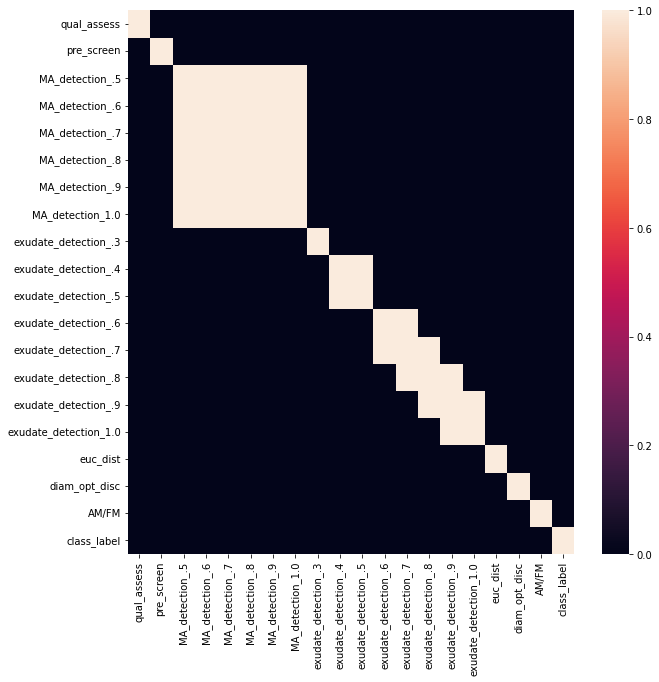

In [6]:
# Heatmap of correlation above 0.8.
fig = plt.figure(figsize = (10,10))
sns.heatmap(abs(df.corr()) > .8)

In [7]:
# Since we will need to drop all but 1 of the MA features, we will try 6 different datasets, each keeping a
# different MA feature. Initialize these data frames by backing copy of original.

df_MA5 = df.copy()
df_MA6 = df.copy()
df_MA7 = df.copy()
df_MA8 = df.copy()
df_MA9 = df.copy()
df_MA10 = df.copy()

In [8]:
# For each new dataframe, specify the MA columns we want to drop (all but 1). Also drop every other exudate
# detection column for all datasets. This will eliminate correlation among exudate features.

drop_5 = ['MA_detection_1.0','MA_detection_.6','MA_detection_.7','MA_detection_.8',
             'MA_detection_.9', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']
drop_6 = ['MA_detection_.5','MA_detection_1.0','MA_detection_.7','MA_detection_.8',
             'MA_detection_.9', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']
drop_7 = ['MA_detection_.5','MA_detection_.6','MA_detection_1.0','MA_detection_.8',
             'MA_detection_.9', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']
drop_8 = ['MA_detection_.5','MA_detection_.6','MA_detection_.7','MA_detection_1.0',
             'MA_detection_.9', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']
drop_9 = ['MA_detection_.5','MA_detection_.6','MA_detection_.7','MA_detection_.8',
             'MA_detection_1.0', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']
drop_10 = ['MA_detection_.5','MA_detection_.6','MA_detection_.7','MA_detection_.8',
             'MA_detection_.9', 'exudate_detection_.4','exudate_detection_.6','exudate_detection_.8',
                  'exudate_detection_1.0']

In [9]:
# Drop appropriate columns to create these dataframes.

df_MA5.drop(columns = drop_5, inplace = True)
df_MA6.drop(columns = drop_6, inplace = True)
df_MA7.drop(columns = drop_7, inplace = True)
df_MA8.drop(columns = drop_8, inplace = True)
df_MA9.drop(columns = drop_9, inplace = True)
df_MA10.drop(columns = drop_10, inplace = True)

In [10]:
# Check to make sure the desired result is achieved. 

print(df_MA5.columns)
print(df_MA6.columns)
print(df_MA7.columns)
print(df_MA8.columns)
print(df_MA9.columns)
print(df_MA10.columns)

Index(['qual_assess', 'pre_screen', 'MA_detection_.5', 'exudate_detection_.3',
       'exudate_detection_.5', 'exudate_detection_.7', 'exudate_detection_.9',
       'euc_dist', 'diam_opt_disc', 'AM/FM', 'class_label'],
      dtype='object')
Index(['qual_assess', 'pre_screen', 'MA_detection_.6', 'exudate_detection_.3',
       'exudate_detection_.5', 'exudate_detection_.7', 'exudate_detection_.9',
       'euc_dist', 'diam_opt_disc', 'AM/FM', 'class_label'],
      dtype='object')
Index(['qual_assess', 'pre_screen', 'MA_detection_.7', 'exudate_detection_.3',
       'exudate_detection_.5', 'exudate_detection_.7', 'exudate_detection_.9',
       'euc_dist', 'diam_opt_disc', 'AM/FM', 'class_label'],
      dtype='object')
Index(['qual_assess', 'pre_screen', 'MA_detection_.8', 'exudate_detection_.3',
       'exudate_detection_.5', 'exudate_detection_.7', 'exudate_detection_.9',
       'euc_dist', 'diam_opt_disc', 'AM/FM', 'class_label'],
      dtype='object')
Index(['qual_assess', 'pre_screen', 

<AxesSubplot:>

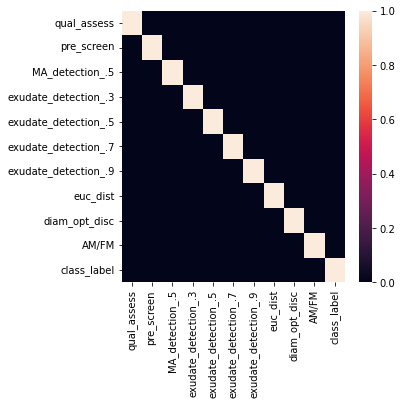

In [11]:
# Check the correlation of each dataframe. 

fig = plt.figure(figsize = (5,5))
sns.heatmap(abs(df_MA5.corr()) > .8)

<AxesSubplot:>

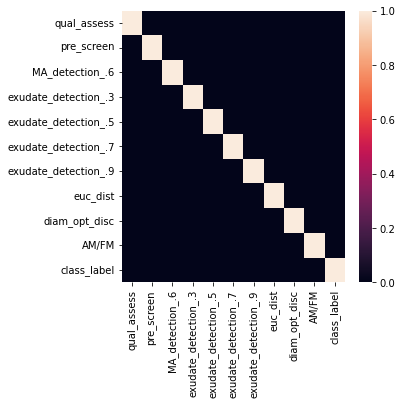

In [12]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(abs(df_MA6.corr()) > .8)

<AxesSubplot:>

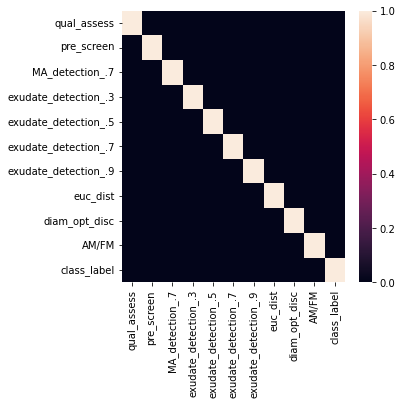

In [13]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(abs(df_MA7.corr()) > .8)

<AxesSubplot:>

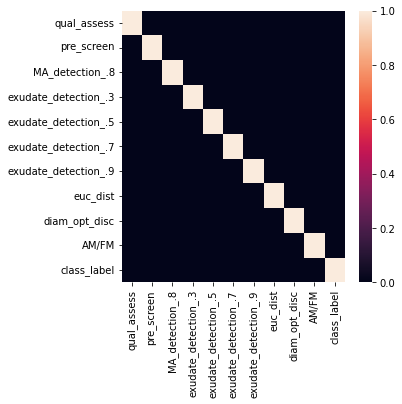

In [14]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(abs(df_MA8.corr()) > .8)

<AxesSubplot:>

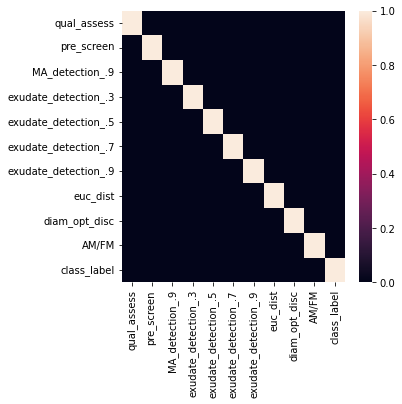

In [15]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(abs(df_MA9.corr()) > .8)

<AxesSubplot:>

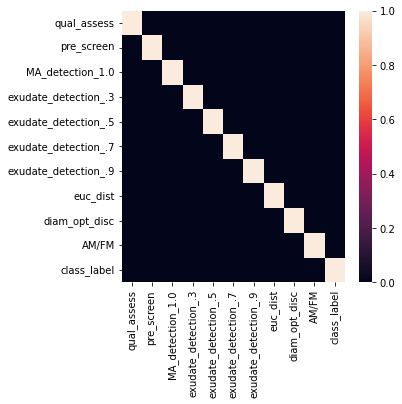

In [16]:
fig = plt.figure(figsize = (5,5))
sns.heatmap(abs(df_MA10.corr()) > .8)

# Prepare data for classification.

In [17]:
# Divide each new dataframe between variables and target. 

X = df.iloc[:,0:-1]
y = df.class_label

X_MA5 = df_MA5.iloc[:,0:-1]
y_MA5 = df_MA5.class_label

X_MA6 = df_MA6.iloc[:,0:-1]
y_MA6 = df_MA6.class_label

X_MA7 = df_MA7.iloc[:,0:-1]
y_MA7 = df_MA7.class_label

X_MA8 = df_MA8.iloc[:,0:-1]
y_MA8 = df_MA8.class_label

X_MA9 = df_MA9.iloc[:,0:-1]
y_MA9 = df_MA9.class_label

X_MA10 = df_MA10.iloc[:,0:-1]
y_MA10 = df_MA10.class_label

In [18]:
# Perform a test-train split for each dataframe.

X_train_MA5, X_test_MA5, y_train_MA5, y_test_MA5 = train_test_split(X_MA5,y_MA5, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA5)

X_train_MA6, X_test_MA6, y_train_MA6, y_test_MA6 = train_test_split(X_MA6,y_MA6, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA6)

X_train_MA7, X_test_MA7, y_train_MA7, y_test_MA7 = train_test_split(X_MA7,y_MA7, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA7)

X_train_MA8, X_test_MA8, y_train_MA8, y_test_MA8 = train_test_split(X_MA8,y_MA8, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA8)

X_train_MA9, X_test_MA9, y_train_MA9, y_test_MA9 = train_test_split(X_MA9,y_MA9, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA9)

X_train_MA10, X_test_MA10, y_train_MA10, y_test_MA10 = train_test_split(X_MA10,y_MA10, 
                                                                    test_size = .2, 
                                                                    random_state = 27,
                                                                    stratify = y_MA10)

In [19]:
# Create a baseline classifier 

dummy = DummyClassifier(strategy='most_frequent', random_state=13).fit(X, y)
dummy_predict = dummy.predict(X)

print('Test Accuracy score: ', accuracy_score(y, dummy_predict))
print('Test F1 score: ', f1_score(y, dummy_predict))

Test Accuracy score:  0.5308427454387489
Test F1 score:  0.6935300794551646


In [20]:
baseline_accuracy = accuracy_score(y, dummy_predict)

In [21]:
# Create dictionaries containing all train sets and all test sets respectively. 

train_sets = {'MA=.5_train':(X_train_MA5,y_train_MA5),
              'MA=.6_train':(X_train_MA6,y_train_MA6),
              'MA=.7_train':(X_train_MA7,y_train_MA7),
              'MA=.8_train':(X_train_MA8,y_train_MA8),
              'MA=.9_train':(X_train_MA9,y_train_MA9),
              'MA=1.0_train':(X_train_MA10,y_train_MA10)}

test_sets = {'MA=.5_test':(X_test_MA5,y_test_MA5),
             'MA=.6_test':(X_test_MA6,y_test_MA6),
             'MA=.7_test':(X_test_MA7,y_test_MA7),
             'MA=.8_test':(X_test_MA8,y_test_MA8),
             'MA=.9_test':(X_test_MA9,y_test_MA9),
             'MA=1.0_test':(X_test_MA10,y_test_MA10)}

In [22]:
# Create a column transformer object to incorporate into pipeline. This object will scale numerical values and leave
# categorical encoded variables untouched. 
preprocess_dict = {}
for key, val in train_sets.items():
    numerical = list(val[0].iloc[:,2:9].columns)
    preprocess_dict[key+'_scaled'] = make_column_transformer((StandardScaler(),numerical),
                                                            remainder = 'passthrough')
    
    

In [23]:
# For each dataframe, each keeping a different MA detection feature, perform a Logistic Regression pipeline.
# Pipeline scales numerical features, performs a PCA and Logistic Regression. A Grid Search with 5-fold 
# cross validation takes the in the pipeline object to optimize the classifer trying various hyperparameters
# and PCA components. Optimal model, best parameters, and best accuracy will be added to a dictionary. 

LR_best_scores = {}
for key, val in train_sets.items():
    preprocess = preprocess_dict[key+'_scaled']
    model = make_pipeline(preprocess, PCA(),LogisticRegression(solver = 'liblinear'))
    params = {
              'pca__n_components': [5,6,7,8,9,None], 
              'logisticregression__penalty':['l1','l2'],
              'logisticregression__C':[100,10,1,.1,.01,.001],
              'logisticregression__fit_intercept':[False,True]
             }

    search_lr = GridSearchCV(estimator = model, param_grid = params,
                     cv = 5, return_train_score = True,
                      n_jobs = -1)

    search_lr.fit(val[0], val[1])
    LR_best_scores[key] = {'model':search_lr, 'best_params':search_lr.best_params_,
                           'best_score':search_lr.best_score_}
    
    

In [24]:
# See which dataframe varying by MA detection feature had the best score. 

for key in train_sets.keys():
    print(key, ': ',LR_best_scores[key]['best_score'])

MA=.5_train :  0.6619565217391304
MA=.6_train :  0.6543478260869565
MA=.7_train :  0.6467391304347826
MA=.8_train :  0.6402173913043478
MA=.9_train :  0.6445652173913043
MA=1.0_train :  0.625


In [25]:
LR_best_scores['MA=.5_train']['best_params']

{'logisticregression__C': 1,
 'logisticregression__fit_intercept': False,
 'logisticregression__penalty': 'l2',
 'pca__n_components': 7}

In [26]:
# Generate classifier metrics for this optimal classifier. 

y_hat_test_MA5_LR = LR_best_scores['MA=.5_train']['model'].predict(X_test_MA5)
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(y_test_MA5,y_hat_test_MA5_LR))
print('Precision Score: ', precision_score(y_test_MA5,y_hat_test_MA5_LR))
print('Recall Score: ', recall_score(y_test_MA5,y_hat_test_MA5_LR))
print('F1 Score: ',f1_score(y_test_MA5,y_hat_test_MA5_LR))

Logistic Regression
Accuracy Score:  0.6623376623376623
Precision Score:  0.8461538461538461
Recall Score:  0.44715447154471544
F1 Score:  0.5851063829787234


In [27]:
# Prepare model for ROC curve. 
y_score_LR = LR_best_scores['MA=.5_train']['model'].decision_function(X_test_MA5)
fpr_LR, tpr_LR, thresholds = roc_curve(y_test_MA5, y_score_LR)

AUC: 0.6965522433002108


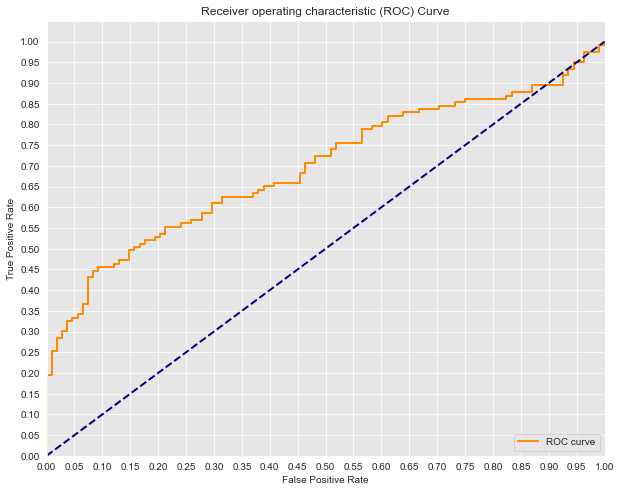

In [28]:
# Generate ROC curve. 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr_LR, tpr_LR)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr_LR, tpr_LR, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()